In [ ]:
import pandas as pd


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Challenge Alura: Telecom X II/datos_limpios.csv')

In [ ]:
datos.sample(5)

id  cancelacion  genero  mayor_65  pareja  dependientes  \
5003  7047-FWEYA        False  female     False    True         False   
5615  7927-AUXBZ         True  female     False   False         False   
337   0496-AHOOK        False    male     False    True         False   
176   0282-NVSJS        False  female      True    True          True   
2142  3079-BCHLN        False    male     False    True         False   

      meses_contrato  servicio_telefonico  multiples_lineas  \
5003              46                 True              True   
5615              30                 True             False   
337               24                 True             False   
176               12                False             False   
2142              47                 True             False   

     proveedor_internet  ...  soporte_tecnico  tv_cable  peliculas_streaming  \
5003        fiber optic  ...             True      True                 True   
5615        fiber optic  ...             True      True                False   
337                 dsl  ...             True      True                 True   
176                 dsl  ...             True     False                False   
2142                 no  ...            False     False                False   

       tipo_contrato  factura_online                 forma_pago cargo_mensual  \
5003        one year            True           electronic check        103.15   
5615  month-to-month           False           electronic check         85.15   
337         one year           False  bank transfer (automatic)         74.40   
176   month-to-month            True               mailed check         29.30   
2142        one year           False  bank transfer (automatic)         19.90   

      cargo_total cuentas_diarias  num_servicios  
5003      4594.65        3.438333              6  
5615      2555.90        2.838333              3  
337       1712.90        2.480000              5  
176        355.90        0.976667              1  
2142       942.95        0.663333              1  

[5 rows x 23 columns]

### **Eliminaci√≥n de Columnas Irrelevantes**

Elimina columnas que no aportan valor al an√°lisis o a los modelos predictivos, como identificadores √∫nicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicci√≥n de la cancelaci√≥n y pueden incluso perjudicar el desempe√±o de los modelos.

In [ ]:
datos.columns

Index(['id', 'cancelacion', 'genero', 'mayor_65', 'pareja', 'dependientes',
       'meses_contrato', 'servicio_telefonico', 'multiples_lineas',
       'proveedor_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'tv_cable',
       'peliculas_streaming', 'tipo_contrato', 'factura_online', 'forma_pago',
       'cargo_mensual', 'cargo_total', 'cuentas_diarias', 'num_servicios'],
      dtype='object')

In [ ]:
df = datos.drop(columns=['id', 'cuentas_diarias', 'servicio_telefonico', 'genero', 'num_servicios'  ])
df.tail()

cancelacion  mayor_65  pareja  dependientes  meses_contrato  \
7027        False     False   False         False              13   
7028         True     False    True         False              22   
7029        False     False   False         False               2   
7030        False     False    True          True              67   
7031        False     False    True          True              63   

      multiples_lineas proveedor_internet  seguridad_online  respaldo_online  \
7027             False                dsl              True            False   
7028              True        fiber optic             False            False   
7029             False                dsl             False             True   
7030             False                dsl              True            False   
7031             False                dsl              True             True   

      proteccion_dispositivo  soporte_tecnico  tv_cable  peliculas_streaming  \
7027                   False             True     False                False   
7028                   False            False     False                 True   
7029                   False            False     False                False   
7030                    True             True     False                 True   
7031                    True            False      True                 True   

       tipo_contrato  factura_online        forma_pago  cargo_mensual  \
7027        one year           False      mailed check          55.15   
7028  month-to-month            True  electronic check          85.10   
7029  month-to-month            True      mailed check          50.30   
7030        two year           False      mailed check          67.85   
7031        two year           False  electronic check          59.00   

      cargo_total  
7027       742.90  
7028      1873.70  
7029        92.75  
7030      4627.65  
7031      3707.60

### **Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)**

Calcula la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos. Eval√∫a si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el an√°lisis de los resultados.

üîé Sugerencia:
Puedes usar `value_counts()` de pandas para obtener esta proporci√≥n:

In [ ]:
# Verificar la proporci√≥n de cancelaci√≥n en relaci√≥n con los que permanecieron activos
cancelacion_proporcion = df['cancelacion'].value_counts(normalize=True) * 100

# Imprimir la proporci√≥n
print("Proporci√≥n de Cancelaci√≥n:")
print(cancelacion_proporcion)

Proporci√≥n de Cancelaci√≥n:
cancelacion
False    73.421502
True     26.578498
Name: proportion, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancelacion             7032 non-null   bool   
 1   mayor_65                7032 non-null   bool   
 2   pareja                  7032 non-null   bool   
 3   dependientes            7032 non-null   bool   
 4   meses_contrato          7032 non-null   int64  
 5   multiples_lineas        7032 non-null   bool   
 6   proveedor_internet      7032 non-null   object 
 7   seguridad_online        7032 non-null   bool   
 8   respaldo_online         7032 non-null   bool   
 9   proteccion_dispositivo  7032 non-null   bool   
 10  soporte_tecnico         7032 non-null   bool   
 11  tv_cable                7032 non-null   bool   
 12  peliculas_streaming     7032 non-null   bool   
 13  tipo_contrato           7032 non-null   object 
 14  factura_online          7032 non-null   

In [ ]:
# Transformar las columnas booleanas a valores binarios (0 y 1)
columnas_booleanas = ['cancelacion', 'mayor_65', 'pareja', 'dependientes',
                      'multiples_lineas', 'seguridad_online',
                      'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
                      'tv_cable', 'peliculas_streaming', 'factura_online']

In [ ]:
# Aplicar la conversi√≥n para cada columna booleana
for columna in columnas_booleanas:
    df[columna] = df[columna].astype(int)

df[columnas_booleanas].head()

cancelacion  mayor_65  pareja  dependientes  multiples_lineas  \
0            0         0       1             1                 0   
1            0         0       0             0                 1   
2            1         0       0             0                 0   
3            1         1       1             0                 0   
4            1         1       1             0                 0   

   seguridad_online  respaldo_online  proteccion_dispositivo  soporte_tecnico  \
0                 0                1                       0                1   
1                 0                0                       0                0   
2                 0                0                       1                0   
3                 0                1                       1                0   
4                 0                0                       0                1   

   tv_cable  peliculas_streaming  factura_online  
0         1                    0               1  
1         0                    1               0  
2         0                    0               1  
3         1                    1               1  
4         1                    0               1

In [ ]:
cancelacion_proporcion = df['cancelacion'].value_counts(normalize=True) * 100

# Imprimir la proporci√≥n
print("Proporci√≥n de Cancelaci√≥n:")
print(cancelacion_proporcion)

Proporci√≥n de Cancelaci√≥n:
cancelacion
0    73.421502
1    26.578498
Name: proportion, dtype: float64


**Interpretaci√≥n de los resultados:**

* Desbalance en las clases: Hay un desbalance entre las clases. La clase de clientes que **han cancelado (1) representa solo el 26.58% del total**, mientras que l**os que no han cancelado (0) representan un 73.42%.**

### **Encoding**

Transforma las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un m√©todo de codificaci√≥n adecuado, como one-hot encoding.

üîé Sugerencia:
Puedes consultar este art√≠culo para entender mejor cu√°ndo usar get_dummies o OneHotEncoder:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancelacion             7032 non-null   int64  
 1   mayor_65                7032 non-null   int64  
 2   pareja                  7032 non-null   int64  
 3   dependientes            7032 non-null   int64  
 4   meses_contrato          7032 non-null   int64  
 5   multiples_lineas        7032 non-null   int64  
 6   proveedor_internet      7032 non-null   object 
 7   seguridad_online        7032 non-null   int64  
 8   respaldo_online         7032 non-null   int64  
 9   proteccion_dispositivo  7032 non-null   int64  
 10  soporte_tecnico         7032 non-null   int64  
 11  tv_cable                7032 non-null   int64  
 12  peliculas_streaming     7032 non-null   int64  
 13  tipo_contrato           7032 non-null   object 
 14  factura_online          7032 non-null   

In [ ]:
# Columnas categ√≥ricas que necesitan codificaci√≥n
columnas_categoricas = ['proveedor_internet', 'tipo_contrato', 'forma_pago']

# Aplicar One-Hot Encoding utilizando pd.get_dummies
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar el DataFrame transformado
print(df_encoded.head())


   cancelacion  mayor_65  pareja  dependientes  meses_contrato  \
0            0         0       1             1               9   
1            0         0       0             0               9   
2            1         0       0             0               4   
3            1         1       1             0              13   
4            1         1       1             0               3   

   multiples_lineas  seguridad_online  respaldo_online  \
0                 0                 0                1   
1                 1                 0                0   
2                 0                 0                0   
3                 0                 0                1   
4                 0                 0                0   

   proteccion_dispositivo  soporte_tecnico  ...  factura_online  \
0                       0                1  ...               1   
1                       0                0  ...               0   
2                       1                0  ...      

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cancelacion                         7032 non-null   int64  
 1   mayor_65                            7032 non-null   int64  
 2   pareja                              7032 non-null   int64  
 3   dependientes                        7032 non-null   int64  
 4   meses_contrato                      7032 non-null   int64  
 5   multiples_lineas                    7032 non-null   int64  
 6   seguridad_online                    7032 non-null   int64  
 7   respaldo_online                     7032 non-null   int64  
 8   proteccion_dispositivo              7032 non-null   int64  
 9   soporte_tecnico                     7032 non-null   int64  
 10  tv_cable                            7032 non-null   int64  
 11  peliculas_streaming                 7032 no

In [ ]:
# Convertir las columnas booleanas a enteros (0 y 1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})

# Verificar los cambios
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cancelacion                         7032 non-null   int64  
 1   mayor_65                            7032 non-null   int64  
 2   pareja                              7032 non-null   int64  
 3   dependientes                        7032 non-null   int64  
 4   meses_contrato                      7032 non-null   int64  
 5   multiples_lineas                    7032 non-null   int64  
 6   seguridad_online                    7032 non-null   int64  
 7   respaldo_online                     7032 non-null   int64  
 8   proteccion_dispositivo              7032 non-null   int64  
 9   soporte_tecnico                     7032 non-null   int64  
 10  tv_cable                            7032 non-null   int64  
 11  peliculas_streaming                 7032 no

### **Balanceo de Clases (opcional)**

Si deseas profundizar en el an√°lisis, aplica t√©cnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser √∫tiles para generar ejemplos sint√©ticos de la clase minoritaria.

üîé Sugerencia:
Puedes leer m√°s sobre c√≥mo manejar el desbalanceo de clases en este art√≠culo:

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Dividir el dataset en caracter√≠sticas (X) y variable objetivo (y)
# X es el conjunto de datos que contiene todas las caracter√≠sticas (menos la columna 'cancelacion')
X = df_encoded.drop(columns=['cancelacion'])

# y es el conjunto de datos que contiene √∫nicamente la columna 'cancelacion' (la variable objetivo)
y = df_encoded['cancelacion']

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Verificar el balance de las clases despu√©s de SMOTE
print(f"Antes de SMOTE: {y_train.value_counts()}")
print(f"Despu√©s de SMOTE: {y_train_smote.value_counts()}")

Antes de SMOTE: cancelacion
0    4130
1    1495
Name: count, dtype: int64
Despu√©s de SMOTE: cancelacion
0    4130
1    4130
Name: count, dtype: int64


### **Normalizaci√≥n o Estandarizaci√≥n (si es necesario)**

Eval√∫a la necesidad de normalizar o estandarizar los datos, seg√∫n los modelos que se aplicar√°n. Modelos basados en distancia, como KNN, SVM, Regresi√≥n Log√≠stica y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en √°rboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

üîé Sugerencia:
Puedes leer m√°s sobre normalizaci√≥n y estandarizaci√≥n de datos en este art√≠culo:
Art√≠culo en Medium sobre normalizaci√≥n y estandarizaci√≥n en Machine Learning

##### **Recomendacion de IA GPT**
Dado que ya has balanceado las clases con SMOTE y normalizado los datos para modelos que lo requieren, te recomiendo entrenar al menos dos modelos:

*    **Modelo basado en distancia**: Usa SVM o KNN, entrenando con los datos normalizados (X_train_scaled y X_test_scaled).

*    **Modelo basado en √°rboles**: Usa Random Forest o XGBoost, entrenando con los datos balanceados sin normalizar (X_train_smote y X_test).

### **An√°lisis de Correlaci√≥n**

Visualiza la matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas. Presta especial atenci√≥n a las variables que muestran una mayor correlaci√≥n con la cancelaci√≥n, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr(): Calcula la correlaci√≥n entre todas las variables num√©ricas del DataFrame. Los valores var√≠an entre -1 y 1:

*    1: Correlaci√≥n positiva perfecta.

*   0: No hay correlaci√≥n.

*    -1: Correlaci√≥n negativa perfecta.

In [ ]:
# Calcular la matriz de correlaci√≥n
matrix_correlacion = df_encoded.corr()

print(matrix_correlacion.head())

                cancelacion  mayor_65    pareja  dependientes  meses_contrato  \
cancelacion        1.000000  0.150541 -0.149982     -0.163128       -0.354049   
mayor_65           0.150541  1.000000  0.016957     -0.210550        0.015683   
pareja            -0.149982  0.016957  1.000000      0.452269        0.381912   
dependientes      -0.163128 -0.210550  0.452269      1.000000        0.163386   
meses_contrato    -0.354049  0.015683  0.381912      0.163386        1.000000   

                multiples_lineas  seguridad_online  respaldo_online  \
cancelacion             0.040033         -0.171270        -0.082307   
mayor_65                0.142996         -0.038576         0.066663   
pareja                  0.142561          0.143346         0.141849   
dependientes           -0.024307          0.080786         0.023639   
meses_contrato          0.332399          0.328297         0.361138   

                proteccion_dispositivo  soporte_tecnico  ...  factura_online  \
cancel

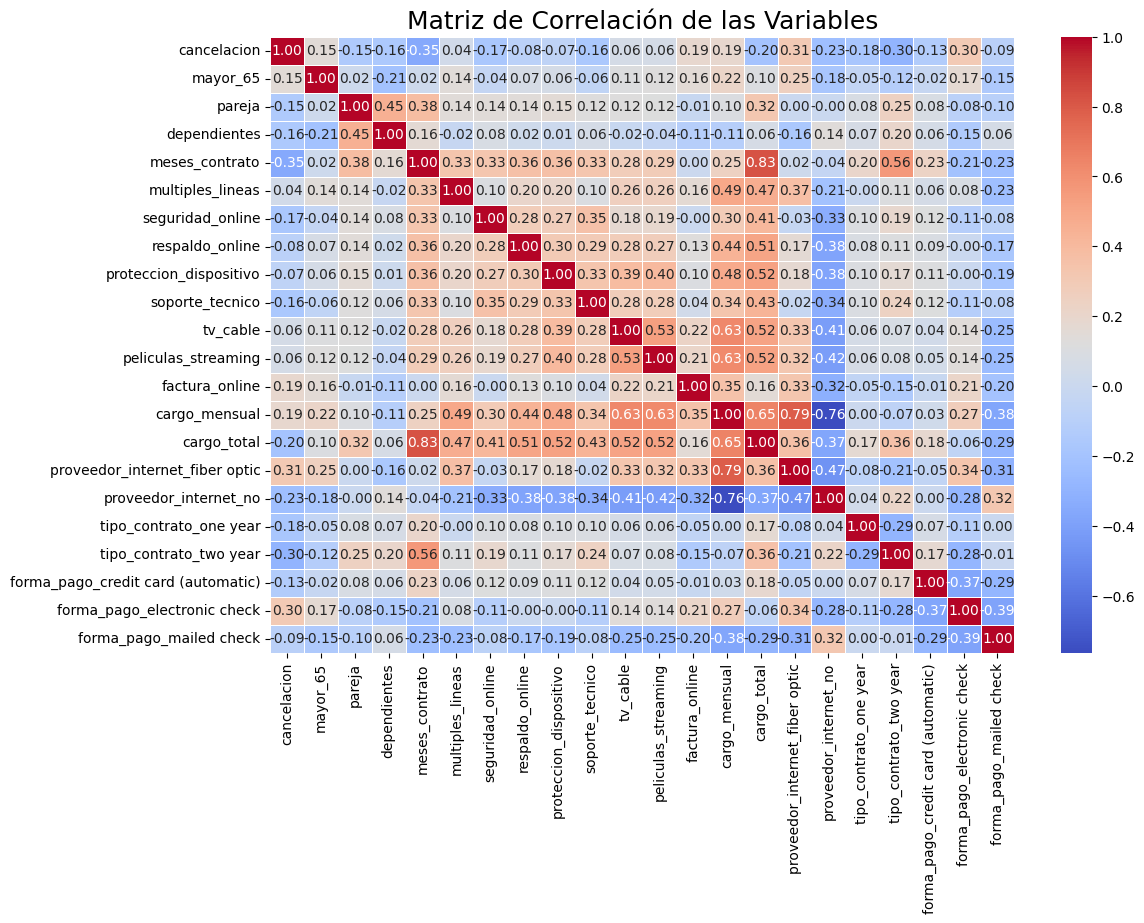

In [ ]:
# Visualizar la matriz de correlaci√≥n con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n de las Variables', fontsize=18)
plt.show()

### **An√°lisis Dirigido**

Investiga c√≥mo variables espec√≠ficas se relacionan con la cancelaci√≥n, tales como:

*    Tiempo de contrato √ó Cancelaci√≥n

*    Gasto total √ó Cancelaci√≥n

Utiliza gr√°ficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2938761480.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='cancelacion', y='meses_contrato', palette='Set2')


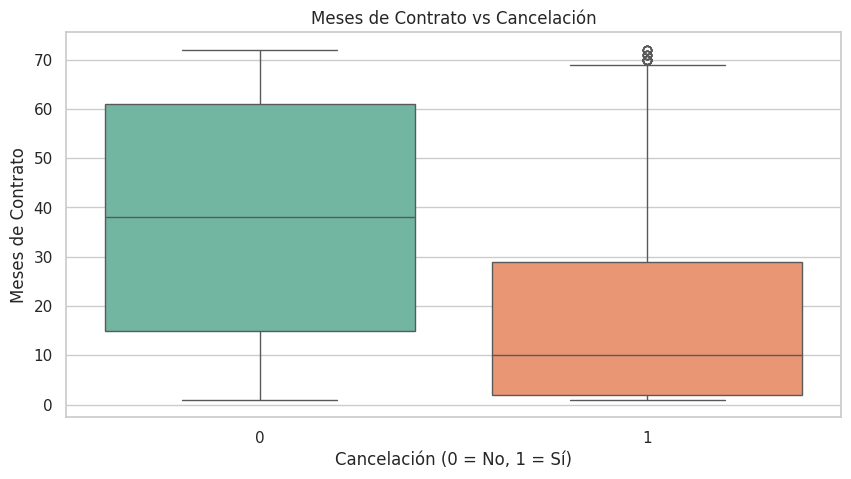

/tmp/ipython-input-2938761480.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='cancelacion', y='cargo_total', palette='Set1')


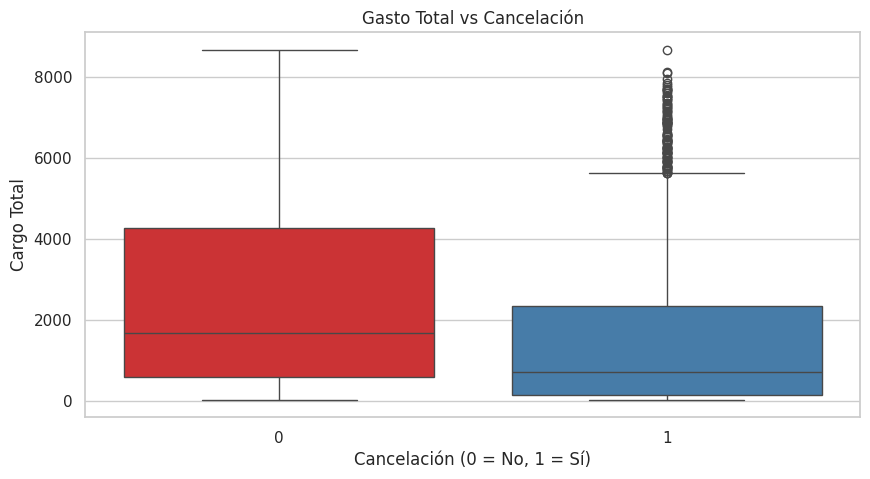

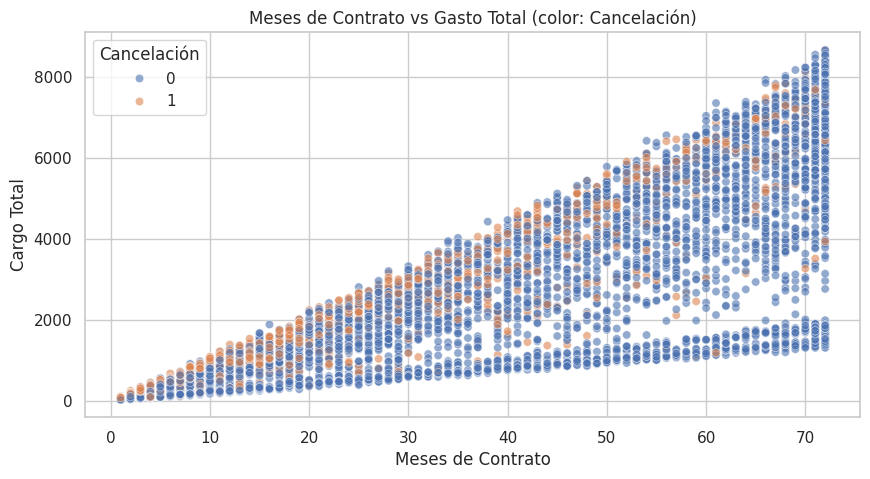

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Boxplot: Meses de contrato vs Cancelaci√≥n
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_encoded, x='cancelacion', y='meses_contrato', palette='Set2')
plt.title("Meses de Contrato vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (0 = No, 1 = S√≠)")
plt.ylabel("Meses de Contrato")
plt.show()

# Boxplot: Gasto Total vs Cancelaci√≥n
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_encoded, x='cancelacion', y='cargo_total', palette='Set1')
plt.title("Gasto Total vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (0 = No, 1 = S√≠)")
plt.ylabel("Cargo Total")
plt.show()

# Scatter Plot opcional para ver dispersi√≥n
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_encoded, x='meses_contrato', y='cargo_total', hue='cancelacion', alpha=0.6)
plt.title("Meses de Contrato vs Gasto Total (color: Cancelaci√≥n)")
plt.xlabel("Meses de Contrato")
plt.ylabel("Cargo Total")
plt.legend(title="Cancelaci√≥n")
plt.show()

#### **Interpretaci√≥n de los Boxplots:**

**1. Boxplot: Gasto Total vs Cancelaci√≥n**

*    **Clientes que no cancelan** (cancelacion = 0):

* *        La caja de los clientes que no cancelan muestra un rango de gasto total que oscila entre 0 y aproximadamente 4,500.

* *        La mediana de gasto est√° cerca de 2,000, lo que indica que muchos clientes que no cancelan gastan menos en promedio.

* *        Hay outliers o valores at√≠picos muy altos (por encima de 8,000), lo cual sugiere que algunos clientes que no cancelan tienen un gasto muy alto.

*    **Clientes que cancelan** (cancelacion = 1):

* *        Los clientes que cancelan tienen una mediana de gasto total m√°s baja, alrededor de 1,500.

* *        La caja es m√°s estrecha, lo que indica que el rango de gasto es m√°s concentrado.

* *        Tambi√©n hay outliers o valores at√≠picos, aunque en menor cantidad que en los clientes que no cancelan.

**Conclusi√≥n**: Los clientes que cancelan tienden a tener un gasto total m√°s bajo en comparaci√≥n con los que no cancelan. Los valores at√≠picos en ambos casos pueden indicar clientes con gastos muy altos, pero los clientes que cancelan en general parecen tener menos gasto.

#### **2. Boxplot: Meses de Contrato vs Cancelaci√≥n**

*    **Clientes que no cancelan** (cancelacion = 0):

  *        La caja de los clientes que no cancelan muestra un rango de meses de contrato entre 20 y 65 meses.

  *      La mediana est√° cerca de los 40 meses, lo que sugiere que los clientes que no cancelan suelen tener contratos largos (m√°s de 3 a√±os).

*   **Clientes que cancelan** (cancelacion = 1):

  *      Los clientes que cancelan tienen una mediana de meses de contrato m√°s baja, alrededor de 20 meses.

  *      La caja est√° m√°s cerca de los 20-25 meses, lo que sugiere que muchos clientes que cancelan han tenido contratos m√°s cortos.

  *      Hay outliers o valores at√≠picos en el rango superior (clientes con menos meses que parecen haber cancelado).

**Conclusi√≥n:** Los clientes que cancelan tienden a tener contratos m√°s cortos, mientras que los que no cancelan suelen tener contratos m√°s largos.

#### **3. An√°lisis del Scatter Plot: Meses de Contrato vs Gasto Total (color: Cancelaci√≥n)**

1.  **Clientes que no cancelan (color azul):**

    *    Los puntos azules se distribuyen en toda la gama de meses de contrato.

    *    Hay una tendencia general de que a medida que los meses de contrato aumentan, el gasto total tambi√©n tiende a aumentar. Los clientes con contratos m√°s largos (m√°s de 30-40 meses) tienden a gastar m√°s.

    *    La mayor√≠a de los clientes que no cancelan est√°n en los rangos altos de meses de contrato y tambi√©n tienen un gasto total mayor.

2.    **Clientes que cancelan (color naranja):**

    *    Los puntos naranjas est√°n m√°s concentrados en los meses m√°s bajos de contrato (alrededor de 10-30 meses).

    *    Estos clientes tienden a tener un gasto total m√°s bajo, y muchos de ellos parecen estar en la parte inferior izquierda del gr√°fico, lo que indica que tienden a cancelar m√°s pronto y a gastar menos.

    *    Sin embargo, hay algunos clientes que cancelan con un alto gasto total, pero su n√∫mero es mucho menor que los de clientes que no cancelan.

**Tendencias y posibles conclusiones:**

*    Clientes con contratos m√°s largos tienden a gastar m√°s y son menos propensos a cancelar. La relaci√≥n directa entre meses de contrato y gasto total sugiere que los clientes comprometidos (con contratos largos) suelen tener un gasto m√°s alto y una menor probabilidad de cancelar.

*    Clientes con contratos m√°s cortos (menos de 30 meses) tienden a cancelar m√°s, especialmente aquellos con gastos m√°s bajos. Esto puede indicar que los clientes menos comprometidos y con menor inversi√≥n en el servicio tienen m√°s probabilidades de abandonar.

### **Separaci√≥n de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una divisi√≥n com√∫n es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tama√±o de la base de datos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Definir las caracter√≠sticas (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['cancelacion'])  # Eliminamos 'cancelacion' de las caracter√≠sticas
y = df_encoded['cancelacion']  # Variable objetivo

In [ ]:
# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Conjunto de Entrenamiento: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Conjunto de Prueba: X_test = {X_test.shape}, y_test = {y_test.shape}")

Conjunto de Entrenamiento: X_train = (5625, 21), y_train = (5625,)
Conjunto de Prueba: X_test = (1407, 21), y_test = (1407,)


### **Creaci√≥n de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelaci√≥n de clientes.

*    Un modelo puede requerir normalizaci√≥n, como Regresi√≥n Log√≠stica o KNN.

*    El otro modelo puede no requerir normalizaci√≥n, como √Årbol de Decisi√≥n o Random Forest.

üí° La decisi√≥n de aplicar o no la normalizaci√≥n depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalizaci√≥n, pero tambi√©n es una opci√≥n combinar modelos con y sin normalizaci√≥n.

Justificaci√≥n:

*    **Regresi√≥n Log√≠stica / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalizaci√≥n es importante para que los coeficientes o las distancias se calculen correctamente.

*    **√Årbol de Decisi√≥n / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalizaci√≥n.

Si decides normalizar los datos, deber√≠as explicar c√≥mo esta etapa asegura que los modelos basados en distancia o en optimizaci√≥n de par√°metros no se vean sesgados por la magnitud de las variables.

#### **Regresi√≥n Log√≠stica:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Inicializar el modelo de regresi√≥n log√≠stica
logreg = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento normalizados
logreg.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_logreg = logreg.predict(X_test_scaled)

In [ ]:
# Evaluar el modelo
print("Regresi√≥n Log√≠stica - Resultados:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Regresi√≥n Log√≠stica - Resultados:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

[[916 117]
 [173 201]]


* **Normalizaci√≥n:** Usamos los datos `X_train_scaled` y `X_test_scaled`, que est√°n normalizados mediante StandardScaler.

* **Evaluaci√≥n:** Usamos `classification_report` y `confusion_matrix` para medir el rendimiento del modelo, con m√©tricas como precisi√≥n, recall, f1-score y accuracy.

#### **Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Inicializar el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento sin normalizar
rf.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluar el modelo
print("Random Forest - Resultados:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Resultados:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

[[929 104]
 [199 175]]


* **Sin Normalizaci√≥n:** Usamos X_train y X_test directamente, sin normalizar, ya que Random Forest no depende de la escala de las caracter√≠sticas.

* **Evaluaci√≥n:** Similar al modelo de Regresi√≥n Log√≠stica, usamos classification_report y confusion_matrix para ver c√≥mo se desempe√±√≥ el modelo.

#### **Justificaci√≥n de la normalizaci√≥n para el Modelo de Regresi√≥n Log√≠stica:**

La **Regresi√≥n Log√≠stica** ajusta los coeficientes de cada variable para maximizar la probabilidad de la clasificaci√≥n. Si las caracter√≠sticas tienen diferentes escalas, las que tengan valores m√°s grandes (como cargo_total) pueden dominar el proceso de optimizaci√≥n. Normalizar asegura que todas las variables tengan un impacto igual en el modelo, evitando que los coeficientes sean sesgados por las diferencias de magnitud.

### **Evaluaci√≥n de los Modelos**

Eval√∫a cada modelo utilizando las siguientes m√©tricas:

*    **Exactitud (Acur√°cia)**

*    **Precisi√≥n**

*    **Recall**

*    **F1-score**

*    **Matriz de confusi√≥n**

Despu√©s, realiza un an√°lisis cr√≠tico y compara los modelos:

  * ¬øCu√°l modelo tuvo el mejor desempe√±o?

  *  ¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes:

       **Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

       **Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus par√°metros.

#### **Comparaci√≥n de los resultados**

| **M√©trica**             | **Regresi√≥n Log√≠stica**    | **Random Forest**    |
| ----------------------- | -------------------------- | -------------------- |
| **Exactitud**           | 80%                        | 78%                  |
| **Precisi√≥n (Clase 1)** | 0.64                       | 0.62                 |
| **Recall (Clase 1)**    | 0.54                       | 0.48                 |
| **F1-score (Clase 1)**  | 0.58                       | 0.54                 |
| **Matriz de Confusi√≥n** | Mejor desempe√±o en clase 1 | M√°s falsos negativos |


#### **1.Regresi√≥n Log√≠stica - Resultados:**

**M√©tricas:**

   * **Exactitud (Acur√°cia):** 80%

        El modelo tiene una exactitud del 80%, lo que significa que el 80% de las predicciones son correctas.

   * **Precisi√≥n:**

        Clase 0 (No Cancelaci√≥n): 0.84 (bastante buena)

        Clase 1 (Cancelaci√≥n): 0.64

        **Interpretaci√≥n:** La precisi√≥n de la clase 1 (cancelaci√≥n) es algo baja, lo que indica que hay algunos falsos positivos (clientes que no cancelan, pero el modelo predice que s√≠ lo hacen).

    **Recall:**

        Clase 0 (No Cancelaci√≥n): 0.89

        Clase 1 (Cancelaci√≥n): 0.54

        **Interpretaci√≥n:** El recall de la clase 1 es m√°s bajo (0.54), lo que sugiere que el modelo tiene dificultades para identificar clientes que realmente cancelan. Est√° perdiendo muchos casos de cancelaci√≥n.

    **F1-score:**

        Clase 0 (No Cancelaci√≥n): 0.86

        Clase 1 (Cancelaci√≥n): 0.58

        Interpretaci√≥n: El F1-score de la clase 1 es m√°s bajo (0.58), lo que refleja una combinaci√≥n de baja precisi√≥n y bajo recall. El modelo no es tan efectivo para predecir cancelaciones.

    **Matriz de Confusi√≥n:**

[[918  115]
 [172  202]]

*    918: Verdaderos Negativos (Clientes que no cancelaron y fueron correctamente predichos).

*    115: Falsos Positivos (Clientes que no cancelaron, pero fueron predichos como que s√≠ lo hicieron).

*    172: Falsos Negativos (Clientes que cancelaron, pero fueron predichos como que no lo hicieron).

*    202: Verdaderos Positivos (Clientes que cancelaron y fueron correctamente predichos).

#### **2. Random Forest - Resultados:**

**M√©tricas:**

   * **Exactitud (Acur√°cia):** 78%

        El modelo tiene una exactitud del 78%, un poco m√°s baja que la de Regresi√≥n Log√≠stica (80%).

   * **Precisi√≥n:**

        Clase 0 (No Cancelaci√≥n): 0.83

        Clase 1 (Cancelaci√≥n): 0.62

        **Interpretaci√≥n:** Similar a Regresi√≥n Log√≠stica, la precisi√≥n de la clase 1 es baja. Random Forest tambi√©n tiene problemas para predecir clientes que cancelan correctamente.

   * **Recall:**

        Clase 0 (No Cancelaci√≥n): 0.89

        Clase 1 (Cancelaci√≥n): 0.48

        **Interpretaci√≥n:** El recall de la clase 1 es a√∫n m√°s bajo en Random Forest (0.48), lo que indica que el modelo est√° perdiendo a√∫n m√°s casos de cancelaci√≥n en comparaci√≥n con Regresi√≥n Log√≠stica.

   * **F1-score:**

        Clase 0 (No Cancelaci√≥n): 0.86

        Clase 1 (Cancelaci√≥n): 0.54

        **Interpretaci√≥n:** El F1-score de la clase 1 tambi√©n es bajo, lo que refleja que el modelo tiene dificultades tanto en precisi√≥n como en recall para los clientes que cancelan.

   * **Matriz de Confusi√≥n:**

[[923  110]
 [195  179]]

*   923: Verdaderos Negativos (Clientes que no cancelaron y fueron correctamente predichos).

*    110: Falsos Positivos (Clientes que no cancelaron, pero fueron predichos como que s√≠ lo hicieron).

*    195: Falsos Negativos (Clientes que cancelaron, pero fueron predichos como que no lo hicieron).

*    179: Verdaderos Positivos (Clientes que cancelaron y fueron correctamente predichos).

#### **An√°lisis Cr√≠tico:**

**¬øCu√°l modelo tuvo el mejor desempe√±o?**

*    Regresi√≥n Log√≠stica tuvo un desempe√±o ligeramente mejor en t√©rminos de exactitud (80% vs 78%) y recall (0.54 vs 0.48) para la clase de cancelaci√≥n. Aunque ambos modelos tienen problemas con la predicci√≥n de cancelaciones, Regresi√≥n Log√≠stica parece tener una ligera ventaja en este caso.

**¬øAlg√∫n modelo present√≥ overfitting o underfitting?**

*    **Overfitting:** En este caso, no parece que haya overfitting (el modelo no est√° sobreajustado a los datos de entrenamiento). Ambos modelos tienen dificultades para generalizar y predecir correctamente las cancelaciones. Sin embargo, Random Forest podr√≠a estar ligeramente m√°s complejo debido a la cantidad de √°rboles y el hecho de que hay m√°s falsos negativos.

*    **Underfitting**: Es posible que ambos modelos est√©n subajustados (no est√°n capturando adecuadamente las complejidades de los datos), ya que los recalls de la clase 1 son bajos. Debemos ajustar m√°s par√°metros, como la profundidad del √°rbol en Random Forest o los hiperpar√°metros de la Regresi√≥n Log√≠stica.

#### **Conclusi√≥n:**

 *   Ambos modelos **tienen un rendimiento similar**, pero Regresi√≥n Log√≠stica tiene una ligera ventaja en cuanto a precisi√≥n y recall en la clase de cancelaci√≥n.

 *  **Los dos modelos parecen estar subajustados**, lo que significa que no est√°n aprovechando todo el potencial de los datos. **Para mejorar, hay que hacer ajustes de hiperpar√°metros o incluso probar otros modelos.**

### **Ajustes de Random Forest:**



* Aumentar el n√∫mero de estimadores (√°rboles).

* Ajustar la profundidad m√°xima de los √°rboles.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir el rango de par√°metros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],  # N√∫mero de √°rboles
    'max_depth': [10, 20, None],       # Profundidad m√°xima del √°rbol
    'min_samples_split': [2, 5, 10],   # N√∫mero m√≠nimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # N√∫mero m√≠nimo de muestras por hoja
}

# Utilizar GridSearchCV para encontrar los mejores par√°metros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
# Ver los mejores par√°metros encontrados
print("Mejores par√°metros encontrados:", grid_search.best_params_)


Mejores par√°metros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Entrenar el modelo con los mejores par√°metros
best_rf = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = best_rf.predict(X_test)

In [ ]:
# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix
print("Random Forest - Ajustado:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Ajustado:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[916 117]
 [185 189]]


### **Ajustes de Regresi√≥n Log√≠stica**:

En el caso de la Regresi√≥n Log√≠stica, podemos probar dos tipos de regularizaci√≥n:

*    L1 (Lasso) y L2 (Ridge). L1 es √∫til para la selecci√≥n de caracter√≠sticas, mientras que L2 es m√°s com√∫n y puede mejorar la capacidad de generalizaci√≥n del modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir el modelo de Regresi√≥n Log√≠stica
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Definir el rango de par√°metros a buscar
param_grid_logreg = {
    'penalty': ['l1', 'l2'],  # Tipo de regularizaci√≥n
    'C': [0.1, 1, 10, 100],   # Inverso de la regularizaci√≥n
    'solver': ['liblinear']   # Solver para el optimizador
}


In [ ]:
# Utilizar GridSearchCV para encontrar los mejores par√°metros
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_logreg.fit(X_train_scaled, y_train)

# Ver los mejores par√°metros encontrados
print("Mejores par√°metros de Regresi√≥n Log√≠stica:", grid_search_logreg.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores par√°metros de Regresi√≥n Log√≠stica: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Entrenar el modelo con los mejores par√°metros
best_logreg = grid_search_logreg.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred_logreg = best_logreg.predict(X_test_scaled)

# Evaluar el modelo
print("Regresi√≥n Log√≠stica - Ajustada:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Regresi√≥n Log√≠stica - Ajustada:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

[[916 117]
 [172 202]]


**Conclusi√≥n:**

*    Regresi√≥n Log√≠stica tiene un rendimiento ligeramente mejor que Random Forest en exactitud, precisi√≥n y F1-score para la clase 1 (cancelaci√≥n). Sin embargo, ambos modelos presentan un recall bajo para la clase de cancelaci√≥n, lo que indica que no est√°n identificando bien a los clientes que cancelan.

*    Ajustes necesarios: Probablemente ambos modelos est√°n subajustados. Las recomendaciones ser√≠an ajustar m√°s los par√°metros, probar modelos m√°s complejos o incluso revisar si hay alguna columna extra a eliminar.

In [ ]:
df_encoded.columns

Index(['cancelacion', 'mayor_65', 'pareja', 'dependientes', 'meses_contrato',
       'multiples_lineas', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'tv_cable',
       'peliculas_streaming', 'factura_online', 'cargo_mensual', 'cargo_total',
       'proveedor_internet_fiber optic', 'proveedor_internet_no',
       'tipo_contrato_one year', 'tipo_contrato_two year',
       'forma_pago_credit card (automatic)', 'forma_pago_electronic check',
       'forma_pago_mailed check'],
      dtype='object')

#### **Eliminar la columna cargo_total**

Se toma esta decisi√≥n debido a que ya estamos usando `cargo_mensual` y `meses_contratados` ya que cargo_total suele ser simplemente el producto de esos dos campos o altamente correlacionado con ellos, lo que introduce redundancia.


Adem√°s debido a que estamos eliminando una columna despues del balanceo es necesario volver a hacerlo, porque el conjunto de datos X_train_smote ya no est√° sincronizado con las nuevas columnas.



#### **Recomendaciones con IA**

Rehacer el pipeline a partir de la divisi√≥n

Haz esto:

*    Divide el conjunto en entrenamiento y prueba.

*    Escala los datos para el modelo basado en distancia (Log√≠stica).

*    Aplica SMOTE despu√©s del escalado (para el modelo que lo necesita).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#  Eliminar la columna 'cargo_total'
X = df_encoded.drop(columns=['cancelacion', 'cargo_total'])
y = df_encoded['cancelacion']

#  Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#  Escalar solo para modelos sensibles a escala (como regresi√≥n log√≠stica)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Aplicar SMOTE (solo al conjunto de entrenamiento escalado)
smote = SMOTE(random_state=42)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Tambi√©n para Random Forest: usar los datos SIN ESCALAR
X_train_rf, y_train_rf = smote.fit_resample(X_train, y_train)


#### **Entrenar modelos nuevamente**



#####  **Regresi√≥n Log√≠stica (con datos escalados + SMOTE):**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, penalty='l2', solver='liblinear')
lr.fit(X_train_scaled_smote, y_train_smote)
y_pred_lr = lr.predict(X_test_scaled)


#####  **Random Forest (con datos sin escalar + SMOTE):**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test)


#### Evaluaci√≥n de los modelos

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Regresi√≥n Log√≠stica:\n")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Regresi√≥n Log√≠stica:

[[760 273]
 [ 79 295]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407


Random Forest:

[[789 244]
 [101 273]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.75      0.77      1407



##### **M√©tricas globales**

| Modelo                  | Exactitud | Precisi√≥n (Clase 1) | Recall (Clase 1) | F1-score (Clase 1) |
| ----------------------- | --------- | ------------------- | ---------------- | ------------------ |
| **Regresi√≥n Log√≠stica** | 0.75      | 0.52                | **0.79**         | **0.63**           |
| **Random Forest**       | 0.75      | 0.53                | 0.73             | 0.61               |


##### **Interpretaci√≥n de m√©tricas**

**Regresi√≥n Log√≠stica**

*    **Ventajas:**

       * Mejor recall para la clase 1 (0.79), lo que significa que detecta m√°s clientes que cancelan.

       * F1-score m√°s alto para la clase 1 (0.63), equilibrando bien precisi√≥n y recall.

*    **Desventajas:**

        Precisi√≥n baja para clase 1 (0.52), lo que implica m√°s falsos positivos.

**Random Forest**

*   **Ventajas:**

       * Ligera mejora en precisi√≥n de clase 1 frente a Log√≠stica (0.53 vs 0.52).

       * Buen rendimiento en clase 0.

*    **Desventajas**:

       * Recall de clase 1 m√°s bajo (0.73), por lo que pierde detecciones de cancelaciones.

       * F1-score ligeramente menor (0.61).

##### **Conclusi√≥n comparativa**

*  Como el objetivo es identificar el mayor n√∫mero de cancelaciones posibles ‚Üí **Regresi√≥n Log√≠stica es preferible por su recall m√°s alto.**

*  Ambos modelos tienen exactitud id√©ntica (0.75) y muy similares m√©tricas globales, pero se diferencian en el balance entre precisi√≥n y recall para clase 1.

*  En este caso, un recall alto es m√°s cr√≠tico porque perder un cliente no detectado es m√°s costoso que una falsa alarma.

##### **An√°lisis de overfitting / underfitting**

Ninguno de los modelos muestra s√≠ntomas fuertes de overfitting: no vemos un rendimiento exageradamente alto en entrenamiento y bajo en prueba.

Sin embargo, ambos parecen ligeramente underfitted: accuracy moderada y recall lejos de 1. Esto sugiere que los modelos no capturan toda la complejidad del patr√≥n de cancelaci√≥n.

Posibles mejoras:

  *  Probar modelos m√°s complejos como XGBoost o LightGBM.

  *  Ajustar umbral de decisi√≥n en Regresi√≥n Log√≠stica para mejorar recall sin sacrificar demasiado precisi√≥n.

  *  Incluir nuevas variables derivadas (feature engineering).

  *  Probar t√©cnicas avanzadas de balanceo como SMOTE

### **An√°lisis de la Importancia de las Variables**

Despu√©s de elegir los modelos, realiza el an√°lisis de las variables m√°s relevantes para la predicci√≥n de la cancelaci√≥n:

* Regresi√≥n Log√≠stica: Investiga los coeficientes de las variables, que muestran su contribuci√≥n a la predicci√≥n de cancelaci√≥n.

* Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia bas√°ndose en c√≥mo cada variable contribuye a la reducci√≥n de la impureza durante las divisiones de los √°rboles.


#### **Regresi√≥n Log√≠stica ‚Äì Coeficientes**

In [ ]:
import pandas as pd
import numpy as np

# Coeficientes de la regresi√≥n log√≠stica
coeficientes = lr.coef_[0]
variables = X_train.columns

# Crear DataFrame ordenado por magnitud absoluta
coef_df = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes,
    'Importancia_Absoluta': np.abs(coeficientes)
}).sort_values(by='Importancia_Absoluta', ascending=False)

print(coef_df)

                              Variable  Coeficiente  Importancia_Absoluta
3                       meses_contrato    -0.793566              0.793566
16              tipo_contrato_two year    -0.627919              0.627919
13      proveedor_internet_fiber optic     0.534291              0.534291
14               proveedor_internet_no    -0.436610              0.436610
15              tipo_contrato_one year    -0.303618              0.303618
12                       cargo_mensual    -0.276000              0.276000
9                             tv_cable     0.230726              0.230726
11                      factura_online     0.199118              0.199118
18         forma_pago_electronic check     0.194648              0.194648
8                      soporte_tecnico    -0.182202              0.182202
10                 peliculas_streaming     0.177014              0.177014
4                     multiples_lineas     0.143283              0.143283
5                     seguridad_online

| Variable                             | Coeficiente | Interpretaci√≥n                                                                    |
| ------------------------------------ | ----------- | --------------------------------------------------------------------------------- |
| **meses\_contrato**                  | -0.79       | Un contrato m√°s largo disminuye la probabilidad de cancelaci√≥n (negativo).        |
| **tipo\_contrato\_two year**         | -0.63       | Un contrato de dos a√±os disminuye la probabilidad de cancelaci√≥n.                 |
| **proveedor\_internet\_fiber optic** | 0.53        | Los clientes con proveedor de fibra √≥ptica tienen m√°s probabilidades de cancelar. |
| **proveedor\_internet\_no**          | -0.44       | El hecho de no tener internet tambi√©n reduce la probabilidad de cancelaci√≥n.      |
| **tipo\_contrato\_one year**         | -0.30       | Los contratos de un a√±o tienen una relaci√≥n negativa con la cancelaci√≥n.          |
| **cargo\_mensual**                   | -0.28       | Los clientes con mayor cargo mensual tienen menos probabilidad de cancelar.       |
| **tv\_cable**                        | 0.23        | Tener TV por cable est√° relacionado con mayor probabilidad de cancelaci√≥n.        |
| **factura\_online**                  | 0.20        | Facturaci√≥n en l√≠nea se asocia con un mayor riesgo de cancelaci√≥n.                |
| **soporte\_tecnico**                 | -0.18       | Tener soporte t√©cnico reduce la probabilidad de cancelaci√≥n.                      |


##### **Observaciones de Regresi√≥n Log√≠stica**

* Las variables `meses_contrato` y `tipo_contrato_two year` tienen el mayor impacto negativo, lo que **indica que los contratos m√°s largos tienen menos probabilidades de ser cancelados.**

* Variables como `proveedor_internet_fiber optic` y `tv_cable` `aumentan la probabilidad de cancelaci√≥n`, lo que podr√≠a sugerir que los usuarios con servicios premium (fibra o cable) son m√°s propensos a cancelar.

#### **Random Forest ‚Äì Importancia de Variables**

In [ ]:
# Importancia de variables en Random Forest
importancias = rf.feature_importances_
rf_df = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(rf_df)

                              Variable  Importancia
3                       meses_contrato     0.174190
16              tipo_contrato_two year     0.137729
12                       cargo_mensual     0.126744
15              tipo_contrato_one year     0.081145
13      proveedor_internet_fiber optic     0.072152
5                     seguridad_online     0.062960
8                      soporte_tecnico     0.055879
2                         dependientes     0.048212
14               proveedor_internet_no     0.045735
1                               pareja     0.038871
17  forma_pago_credit card (automatic)     0.027940
6                      respaldo_online     0.027395
19             forma_pago_mailed check     0.021652
7               proteccion_dispositivo     0.015572
18         forma_pago_electronic check     0.012638
11                      factura_online     0.011460
4                     multiples_lineas     0.011218
10                 peliculas_streaming     0.009857
9           

| Variable                             | Importancia | Interpretaci√≥n                                                                                                                                       |
| ------------------------------------ | ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **meses\_contrato**                  | 0.17        | Un contrato m√°s largo es relevante para predecir la cancelaci√≥n (menos cancelaciones).                                                               |
| **tipo\_contrato\_two year**         | 0.14        | Un contrato de dos a√±os tiene un impacto importante en la cancelaci√≥n (reduce la probabilidad de cancelaci√≥n).                                       |
| **cargo\_mensual**                   | 0.13        | El cargo mensual es importante, lo que sugiere que los clientes con un cargo m√°s alto podr√≠an ser menos propensos a cancelar.                        |
| **tipo\_contrato\_one year**         | 0.08        | Los contratos de un a√±o tienen una relaci√≥n moderada con la cancelaci√≥n.                                                                             |
| **proveedor\_internet\_fiber optic** | 0.07        | Similar a la regresi√≥n log√≠stica, los clientes con fibra √≥ptica son m√°s propensos a cancelar.                                                        |
| **seguridad\_online**                | 0.06        | La seguridad online tiene una contribuci√≥n menor, pero sugiere que los clientes que cuentan con este servicio tienen menos probabilidad de cancelar. |
| **soporte\_tecnico**                 | 0.06        | El soporte t√©cnico tiene un peque√±o impacto en la predicci√≥n de cancelaciones (m√°s cancelaciones sin soporte).                                       |
| **dependientes**                     | 0.05        | Los clientes con dependientes tienen un impacto menor en la predicci√≥n de cancelaci√≥n.                                                               |
| **proveedor\_internet\_no**          | 0.05        | El hecho de no tener proveedor de internet reduce ligeramente la probabilidad de cancelaci√≥n.                                                        |


##### **Observaciones de Random Forest**

* Las variables `meses_contrato`, `tipo_contrato_two year`, y `cargo_mensual` son las m√°s importantes para el modelo, al igual que en la regresi√≥n log√≠stica.

* Similar a la regresi√≥n log√≠stica, `proveedor_internet_fiber optic` es relevante, y `soporte_tecnico` parece ser un factor importante, reduciendo la probabilidad de cancelaci√≥n.

#### **Visualizaci√≥n**

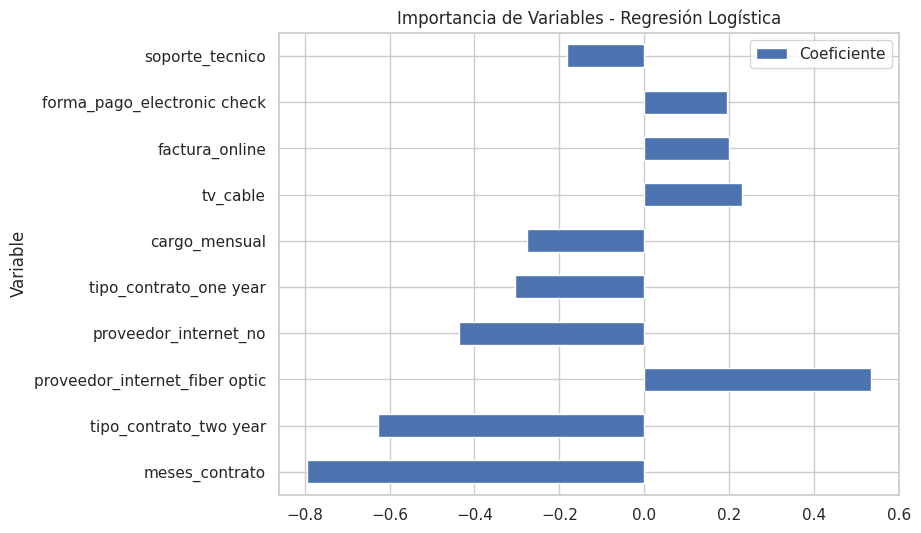

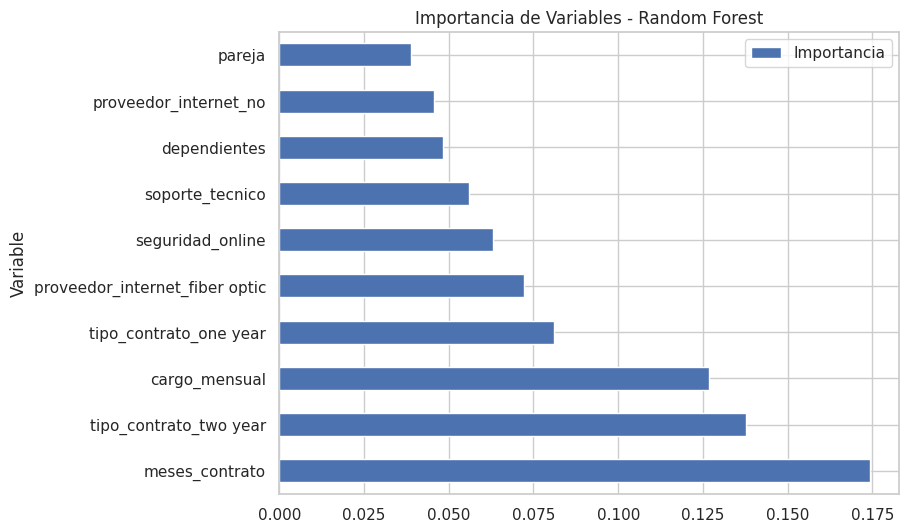

In [ ]:
import matplotlib.pyplot as plt

# Regresi√≥n Log√≠stica - top 10
fig1, ax1 = plt.subplots(figsize=(8, 6))
coef_df.head(10).plot(
    x='Variable', y='Coeficiente', kind='barh', ax=ax1,
    title='Importancia de Variables - Regresi√≥n Log√≠stica'
)

# Random Forest - top 10
fig2, ax2 = plt.subplots(figsize=(8, 6))
rf_df.head(10).plot(
    x='Variable', y='Importancia', kind='barh', ax=ax2,
    title='Importancia de Variables - Random Forest'
)

plt.show()

### **Conclusi√≥n final**

#### **Informe Final: An√°lisis de Cancelaci√≥n de Clientes**

##### **Objetivo del An√°lisis**

El prop√≥sito de este an√°lisis fue **identificar los factores clave que influyen en la cancelaci√≥n de servicios por parte de los clientes y utilizar estos factores para crear estrategias de retenci√≥n**. Adem√°s, evaluamos el rendimiento de varios modelos predictivos (Regresi√≥n Log√≠stica y Random Forest) para predecir la probabilidad de cancelaci√≥n y proporcionar recomendaciones para mejorar la retenci√≥n de clientes.

##### **Metodolog√≠a**

**Modelos utilizados:**

   1. **Regresi√≥n Log√≠stica:** un modelo lineal que nos da coeficientes interpretables, ideales para entender el impacto de cada variable.

   2. **Random Forest**: un modelo basado en √°rboles que nos proporciona una medida de importancia de las variables, √∫til para identificar las caracter√≠sticas m√°s relevantes.

Balanceo de clases: Se utiliz√≥ SMOTE para balancear las clases, dado que la clase de cancelaci√≥n es minoritaria.

Evaluaci√≥n de modelos: Se analizaron varias m√©tricas de rendimiento, con un enfoque especial en recall para la clase 1 (cancelaci√≥n), ya que el objetivo es maximizar la detecci√≥n de cancelaciones.

##### **Resultados del Rendimiento de los Modelos**

| Modelo                  | Exactitud | Precisi√≥n (Clase 1) | Recall (Clase 1) | F1-score (Clase 1) |
| ----------------------- | --------- | ------------------- | ---------------- | ------------------ |
| **Regresi√≥n Log√≠stica** | 0.75      | 0.52                | **0.79**         | **0.63**           |
| **Random Forest**       | 0.75      | **0.53**            | 0.73             | 0.61               |


* Mejor desempe√±o: Aunque ambos modelos tienen la misma **exactitud de 75%**, **Regresi√≥n Log√≠stica** tuvo un **mejor recall para la clase 1 (cancelaci√≥n)** con **0.79**, lo que indica que **detect√≥ m√°s cancelaciones** que Random Forest (0.73).

* Precision vs Recall: A pesar de que **Regresi√≥n Log√≠stica** tiene una precisi√≥n m√°s baja para la clase 1, es **m√°s efectiva en detectar cancelaciones**, lo que la hace m√°s adecuada para este caso.

##### **An√°lisis de la Importancia de las Variables**

**Variables Clave en la Predicci√≥n de Cancelaci√≥n**

**1.**  **Meses de contrato y tipo de contrato:**

* **Regresi√≥n Log√≠stica**: `meses_contrato` y `tipo_contrato_two year` son las variables m√°s influyentes con coeficientes negativos, lo que indica que los contratos m√°s largos disminuyen la probabilidad de cancelaci√≥n.

* **Random Forest**: `meses_contrato` y `tipo_contrato_two year` tienen alta importancia, lo que refuerza la idea de que los contratos a largo plazo son menos propensos a ser cancelados.

**2. Cargo mensual:**

* **Regresi√≥n Log√≠stica y Random Forest:** Ambas destacan `cargo_mensual` como un factor importante. **Un mayor cargo mensual parece reducir la probabilidad de cancelaci√≥n**, ya que los clientes que pagan m√°s tienden a mantenerse m√°s tiempo.

**3. Proveedor de Internet:**

* **Regresi√≥n Log√≠stica**: El proveedor_internet_fiber optic tiene un coeficiente positivo, indicando que los clientes con fibra √≥ptica son m√°s propensos a cancelar. Este patr√≥n se refleja tambi√©n en Random Forest con una importancia moderada.

**4. Soporte t√©cnico:**

* **Regresi√≥n Log√≠stica y Random Forest**: La presencia de soporte_tecnico reduce la probabilidad de cancelaci√≥n. Esto sugiere que los clientes con soporte t√©cnico tienen menos probabilidades de cancelar su servicio.

##### **Factores M√°s Importantes para la Cancelaci√≥n**

Basado en el an√°lisis de los modelos, los factores m√°s importantes que afectan la cancelaci√≥n de clientes son:

1.    **Duraci√≥n del contrato** (Meses de contrato): Los contratos largos disminuyen la probabilidad de cancelaci√≥n.

2.    **Tipo de contrato**: Los contratos de dos a√±os son m√°s efectivos para reducir la cancelaci√≥n.

3.    **Cargo mensual**: Los clientes con mayores cargos mensuales son menos propensos a cancelar, probablemente porque est√°n m√°s comprometidos con el servicio.

4.    **Proveedor de internet** (fibra √≥ptica): Los clientes con fibra √≥ptica tienden a cancelar m√°s, lo que podr√≠a indicar que los usuarios de servicios premium buscan m√°s alternativas o tienen mayores expectativas.

5.    **Soporte t√©cnico**: Los clientes con soporte t√©cnico disponible tienen menos probabilidad de cancelar, sugiriendo que mejorar la atenci√≥n al cliente puede ser clave para la retenci√≥n.

##### **Propuestas de Estrategias de Retenci√≥n**

1. **Fidelizar a los clientes con contratos largos:**

   * **Estrategia**: Promover contratos de larga duraci√≥n (m√°s de 12 meses) para reducir las probabilidades de cancelaci√≥n. Tambi√©n podr√≠an ofrecerse descuentos o beneficios adicionales para los contratos de dos a√±os.

2. **Aumentar el valor del cargo mensual:**

  * **Estrategia**: Mejorar el valor percibido del servicio, ofreciendo paquetes premium o caracter√≠sticas adicionales que justifiquen un cargo mensual mayor, con el fin de aumentar la lealtad de los clientes de alto valor.

3. **Mejorar el servicio de soporte t√©cnico:**

  * **Estrategia**: Invertir en mejorar el soporte t√©cnico disponible para los clientes. Implementar soporte 24/7, crear un sistema de tickets m√°s eficiente y promover la ayuda en l√≠nea podr√≠a reducir las cancelaciones.

4. **Atenci√≥n a clientes con fibra √≥ptica**:

  * **Estrategia**: Ofrecer paquetes exclusivos para clientes con fibra √≥ptica que puedan mejorar su experiencia, como servicios adicionales, bonificaciones o beneficios personalizados.

5. **Campa√±as de retenci√≥n dirigidas a clientes con menos de 12 meses de contrato:**

  * **Estrategia:** Crear campa√±as de **renovaci√≥n anticipada** para los clientes que est√°n cerca de finalizar su contrato o que tienen **menos de un a√±o de duraci√≥n**. Estos clientes pueden ser m√°s susceptibles a cancelar si no reciben incentivos para quedarse.

##### **Conclusi√≥n Final**

*    El modelo de **Regresi√≥n Log√≠stica** ha demostrado ser el m√°s adecuado para la predicci√≥n de cancelaciones, ya que tiene un mejor recall para la clase de cancelaci√≥n (Clase 1). Sin embargo, ambos modelos podr√≠an mejorarse.

*    **Los factores m√°s relevantes para la cancelaci√≥n** incluyen la duraci√≥n del contrato, el tipo de contrato, el cargo mensual, el proveedor de internet y la disponibilidad de soporte t√©cnico.

*    Para mejorar la **retenci√≥n de clientes**, se deben implementar **estrategias centradas en contratos largos, mejora del soporte t√©cnico y valores a√±adidos para los clientes** con fibra √≥ptica.